In [1]:
import pandas as pd
from classifiers import BaselineRandomForest
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
training_features = pd.read_parquet('training_features.parquet')
training_features

,Amplitude_1,Amplitude_2,AndersonDarling_1,AndersonDarling_2,Autocor_length_1,Autocor_length_2,Beyond1Std_1,Beyond1Std_2,Con_1,Con_2,...,n_neg_1,n_neg_2,n_non_det_after_fid_1,n_non_det_after_fid_2,n_non_det_before_fid_1,n_non_det_before_fid_2,n_pos_1,n_pos_2,positive_fraction_1,positive_fraction_2
oid,,,,,,,,,,,,,,,,,,,,,
ZTF17aabtvsy,0.796154,0.621909,0.997141,0.499209,2.0,1.0,0.200000,0.230769,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,10.0,12.0,1.0,0.923077
ZTF17aacldgo,0.220090,0.153436,0.989072,0.835077,2.0,1.0,0.250000,0.250000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,1.0,1.000000
ZTF17aadlxmv,1.122400,0.923865,0.897997,0.788392,2.0,2.0,0.307692,0.263158,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13.0,19.0,1.0,1.000000
ZTF18aaaibml,0.633645,0.243741,0.986328,0.999987,2.0,1.0,0.200000,0.166667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,12.0,1.0,1.000000
ZTF18aaaonon,0.411855,NaN,0.309516,NaN,1.0,NaN,0.333333,NaN,0.0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF22abunrdy,NaN,0.126923,NaN,0.888343,NaN,5.0,NaN,0.388889,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,36.0,NaN,1.000000
ZTF22abunrnh,NaN,0.128306,NaN,0.815956,NaN,5.0,NaN,0.305556,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,36.0,NaN,1.000000
ZTF22abuygtu,NaN,0.317655,NaN,0.608089,NaN,2.0,NaN,0.166667,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,1.0,1.000000


In [3]:
training_labels = pd.read_parquet('training_labels.parquet')
training_labels.set_index('Disc. Internal Name', inplace=True)
training_labels

,ID,Name,RA,DEC,Obj. Type,Redshift,Host Name,Host Redshift,Reporting Group/s,Discovery Data Source/s,...,End Prop. Period,Discovery Mag/Flux,Discovery Filter,Discovery Date (UT),Sender,Remarks,Discovery Bibcode,Classification Bibcodes,Ext. catalog/s,grouped_class
Disc. Internal Name,,,,,,,,,,,,,,,,,,,,,
ZTF22abiysva,117095,SN 2022wcu,00:41:23.109,+08:58:29.79,SN Ia,0.063000,SDSS J004123.01+085828.7,NaN,"ALeRCE, ATLAS, Fink, Pan-STARRS","ZTF, ATLAS, Pan-STARRS",...,None,20.8578,g-ZTF,2022-09-26 08:37:15.001,ALeRCE,NaN,2022TNSTR2802....1M,2022TNSCR2889....1F,NaN,SNIa
ZTF20aammhli,53913,SN 2020cdj,17:56:11.710,+62:45:25.45,SN Ia,0.015000,None,NaN,"ZTF, ATLAS, GaiaAlerts, Pan-STARRS","ZTF, ATLAS, GaiaAlerts, Pan-STARRS",...,None,19.4200,r-ZTF,2020-02-08 13:09:14.000,ZTF_AMPEL_NEW,NaN,2020TNSTR.439....1N,"2020TNSCR.480....1S, 2020TNSCR1493....1D",NaN,SNIa
ZTF21acckcni,92428,SN 2021yys,07:25:42.211,+44:49:25.11,SN IIn,0.043293,CGCG 205-044,0.043293,"ALeRCE, ATLAS, Pan-STARRS","ZTF, ATLAS, Pan-STARRS",...,None,19.2263,r-ZTF,2021-09-15 11:49:52.997,ALeRCE,NaN,2021TNSTR3190....1M,2021TNSCR3472....1P,NaN,SNIIn
ZTF22abfxmvf,116214,SN 2022uwh,23:53:37.143,+11:22:58.20,SN Ia,0.090000,None,NaN,"ZTF, ATLAS","ZTF, ATLAS",...,None,20.0300,g-ZTF,2022-09-17 06:30:14.400,ZTF_Bot1,NaN,2022TNSTR2705....1F,2022TNSCR2828....1F,NaN,SNIa
ZTF21aaxtctv,82592,SN 2021krf,12:51:17.443,+00:31:14.73,SN Ic,0.013560,2MASX J12511712+0031138,0.013565,"ALeRCE, ATLAS, Pan-STARRS, Fink","ZTF, ATLAS, Pan-STARRS",...,None,18.0035,g-ZTF,2021-04-30 05:06:04.000,ALeRCE,NaN,2021TNSTR1392....1M,"2021TNSCR1479....1P, 2021TNSCR1513....1D",NaN,SNIbc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF22abfzaqd,116012,SN 2022uou,05:09:24.069,+74:55:04.14,SN Ia,0.063000,None,NaN,"ZTF, Fink",ZTF,...,None,20.8800,r-ZTF,2022-09-05 11:15:21.600,ZTF_Bot1,NaN,2022TNSTR2678....1F,2022TNSCR2730....1F,NaN,SNIa
ZTF22aafntmb,106791,SN 2022hmm,12:42:15.856,+18:38:12.28,SN Ia,0.074613,None,NaN,"ZTF, Pan-STARRS, ATLAS","ZTF, Pan-STARRS, ATLAS",...,None,19.8900,g-ZTF,2022-04-10 06:11:31.200,ZTF_Bot1,NaN,2022TNSTR.962....1F,2022TNSCR1140....1C,NaN,SNIa
ZTF20acwnqcy,72673,SN 2020aceh,07:35:43.815,+11:15:53.85,SN IIb,0.040788,WISEA J073543.65+111554.1,NaN,"ALeRCE, ZTF",ZTF,...,None,20.2141,g-ZTF,2020-12-10 10:48:17.997,ALeRCE,NaN,2020TNSTR3732....1M,2021TNSCR.479....1D,NaN,SNIIb


In [4]:
brf = BaselineRandomForest()

In [5]:
training_features

,Amplitude_1,Amplitude_2,AndersonDarling_1,AndersonDarling_2,Autocor_length_1,Autocor_length_2,Beyond1Std_1,Beyond1Std_2,Con_1,Con_2,...,n_neg_1,n_neg_2,n_non_det_after_fid_1,n_non_det_after_fid_2,n_non_det_before_fid_1,n_non_det_before_fid_2,n_pos_1,n_pos_2,positive_fraction_1,positive_fraction_2
oid,,,,,,,,,,,,,,,,,,,,,
ZTF17aabtvsy,0.796154,0.621909,0.997141,0.499209,2.0,1.0,0.200000,0.230769,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,10.0,12.0,1.0,0.923077
ZTF17aacldgo,0.220090,0.153436,0.989072,0.835077,2.0,1.0,0.250000,0.250000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,1.0,1.000000
ZTF17aadlxmv,1.122400,0.923865,0.897997,0.788392,2.0,2.0,0.307692,0.263158,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13.0,19.0,1.0,1.000000
ZTF18aaaibml,0.633645,0.243741,0.986328,0.999987,2.0,1.0,0.200000,0.166667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,12.0,1.0,1.000000
ZTF18aaaonon,0.411855,NaN,0.309516,NaN,1.0,NaN,0.333333,NaN,0.0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF22abunrdy,NaN,0.126923,NaN,0.888343,NaN,5.0,NaN,0.388889,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,36.0,NaN,1.000000
ZTF22abunrnh,NaN,0.128306,NaN,0.815956,NaN,5.0,NaN,0.305556,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,36.0,NaN,1.000000
ZTF22abuygtu,NaN,0.317655,NaN,0.608089,NaN,2.0,NaN,0.166667,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,1.0,1.000000


In [6]:
brf.fit(training_features, training_labels)

## Classification metrics (training set)

In [7]:
train_prediction_probs = brf.predict_proba(training_features)
train_prediction = train_prediction_probs.idxmax(axis=1)

In [8]:
a = pd.concat([training_labels['grouped_class'], train_prediction], axis=1)
print(classification_report(a['grouped_class'], a[0]))

              precision    recall  f1-score   support

        SLSN       0.53      1.00      0.69        76
        SNII       0.80      0.68      0.74       529
       SNIIb       0.14      1.00      0.24        41
       SNIIn       0.64      0.98      0.77       113
        SNIa       0.98      0.76      0.86      2794
       SNIbc       0.31      0.91      0.47       167

    accuracy                           0.77      3720
   macro avg       0.57      0.89      0.63      3720
weighted avg       0.90      0.77      0.81      3720



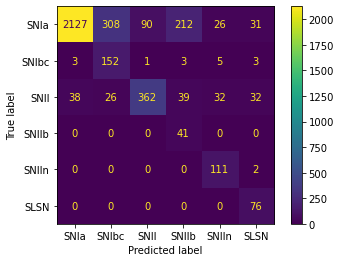

In [9]:
labels = [
    'SNIa',
    'SNIbc',
    'SNII',
    'SNIIb',
    'SNIIn',
    'SLSN'
]
cm = confusion_matrix(a['grouped_class'], a[0], labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

## Classification metrics (test set)

In [10]:
test_labels = pd.read_parquet('test_labels.parquet')
test_features = pd.read_parquet('test_features.parquet')
test_labels.set_index('Disc. Internal Name', inplace=True)

In [11]:
test_prediction_probs = brf.predict_proba(test_features)
test_prediction = test_prediction_probs.idxmax(axis=1)

In [12]:
a = pd.concat([test_labels['grouped_class'], test_prediction], axis=1)
print(classification_report(a['grouped_class'], a[0]))

              precision    recall  f1-score   support

        SLSN       0.26      0.58      0.36        19
        SNII       0.77      0.57      0.66       132
       SNIIb       0.04      0.40      0.08        10
       SNIIn       0.35      0.52      0.42        29
        SNIa       0.95      0.75      0.84       699
       SNIbc       0.12      0.31      0.18        42

    accuracy                           0.69       931
   macro avg       0.42      0.52      0.42       931
weighted avg       0.85      0.69      0.75       931



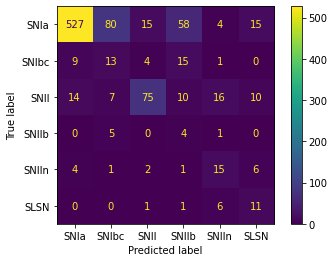

In [13]:
cm = confusion_matrix(a['grouped_class'], a[0], labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()